## MODULE 2 - Assessment
You have just been employed as Data analyst in one of the fast growing product
manufacturing and distribution companies and your first welcoming task by MD is to
create a report for an upcoming board meeting. You are to go through and analyze the
sales data from 2015-2017 in order to generate the requested report.
The report should capture the following;
1. Revenue by region
2. Revenue by sales Rep
3. Revenue by products
4. Sales trend
5. Yearly changes in revenue
**Highlight the following on the report:**
* Top 3 products
* The most productive sales Rep in the respective years.
From your analysis, give 3 recommendations you think would help the company
increase revenue in the following year.

**Data Source:**<br>
https://docs.google.com/spreadsheets/d/1SWCOO70Yv7PPvmlLyLQj1gCilg1XsSl0/edit?usp=sharing&ouid=102731908679789782364&rtpof=true&sd=true

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup our visuals to use seaborn by default
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (11, 4)

In [3]:
# Import our data using pandas
df = pd.read_excel('MODULE 2-Assessment working data.xlsx')

# Convert the sales excel file into .csv (Comma Separated Value)
# This is only done because because I feel more comfortable working with Csv files to xlsx files
df = df.to_csv('sales-data.csv', index=False)

# Read the sales data
df = pd.read_csv('sales-data.csv')

In [4]:
df.head()

,Date,SalesRep,Region,Product,Color,Units,Revenue
0,2015-11-06,Julie,East,Sunshine,Blue,4,78.8
1,2015-11-07,Adam,West,Bellen,Clear,4,123.0
2,2015-11-07,Julie,East,Aspen,Clear,1,26.0
3,2015-11-07,Nabil,South,Quad,Clear,2,69.0
4,2015-11-07,Julie,South,Aspen,Blue,2,51.0


In [5]:
df.describe(include=['object','float','int'])

,Date,SalesRep,Region,Product,Color,Units,Revenue
count,9971,9971,9971,9971,9971,9971.000000,9971.000000
unique,717,6,3,7,5,NaN,NaN
top,2016-09-11,Julie,West,Bellen,Red,NaN,NaN
freq,77,2233,4417,1948,3020,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.388828,91.181513
std,NaN,NaN,NaN,NaN,NaN,4.320759,120.894473
min,NaN,NaN,NaN,NaN,NaN,1.000000,21.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,42.900000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,60.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,76.500000


### Some useful Insights

There was a total of `9,971` sales entries between 2015-2017 out of which the following descriptions were made:

**Units:**
* The minimum number of units sold between 2015-2017 was `1` 
* The maximum number of units sold between 2015-2017 was `25`
* The average number of units sold between 2015-2017 was aproximately `3`

**Revenue**
* The least revenue generated between 2015-2017 was `21` 
* The most revenue between 2015-2017 was approximately `1902`

**---Others---**
* We had `6` unique Sales Representatives between 2015-2017 
* We covered `3` Regions between 2015-2017
* `5` unique colors

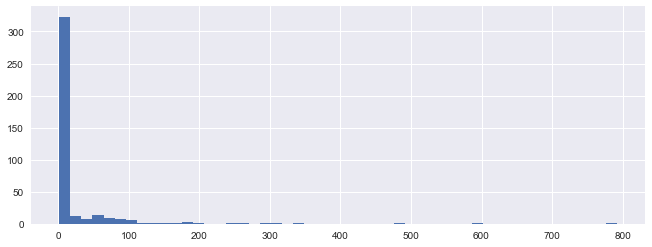

In [6]:
# At what amount did we sell most?

df['Revenue'].value_counts().hist(bins=50);

Here most items were sold between 21 - 70 respectively

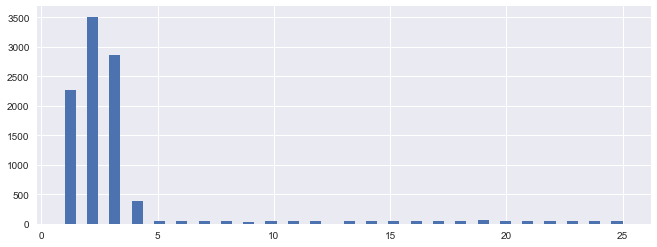

In [7]:
df['Units'].hist(bins=50);

In [8]:
# What's the total revenue generated between 2015-2017?

round(df['Revenue'].sum())

909171

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9971 non-null   object 
 1   SalesRep  9971 non-null   object 
 2   Region    9971 non-null   object 
 3   Product   9971 non-null   object 
 4   Color     9971 non-null   object 
 5   Units     9971 non-null   int64  
 6   Revenue   9971 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 545.4+ KB


In [10]:
# Check if we have any missing entry
df.isna().sum()

Date        0
SalesRep    0
Region      0
Product     0
Color       0
Units       0
Revenue     0
dtype: int64

No entry is missing

## Revenue by region

In [57]:
region_revenue = pd.DataFrame(df.groupby(by=['Region'])['Revenue'].sum())
region_revenue.sort_values(ascending=False, by='Revenue')

,Revenue
Region,
West,408037.58
South,263256.50
East,237876.79


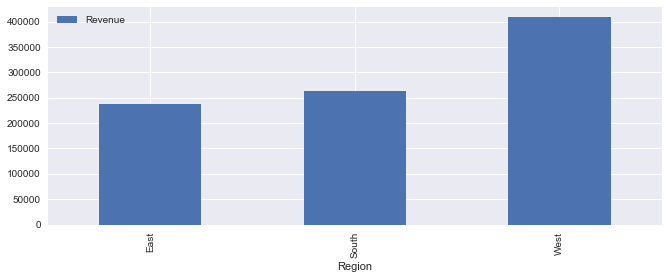

In [58]:
# Visualize region impact via revenue
region_revenue.plot(kind='bar');

It's very clear that the `West Region` generated the most revenue

## Revenue by sales Rep

In [13]:
sales_rep_revenue = df.groupby(by=['SalesRep'])['Revenue'].sum()
sales_rep_revenue = pd.DataFrame(sales_rep_revenue).sort_values(ascending=True, by='Revenue')
sales_rep_revenue

,Revenue
SalesRep,
Nicole,92026.68
Adam,102715.60
Jessica,145496.28
Nabil,158904.48
Julie,204450.05
Mike,205577.78


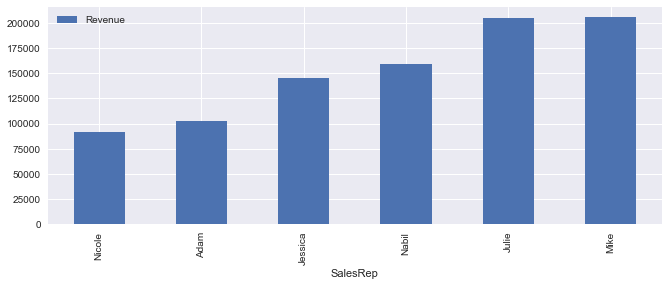

In [14]:
# Visualize salesRep impact via revenue
sales_rep_revenue.plot(kind='bar');

In [15]:
'Mike Slightly beat Julie in revenue generation by ' + str(round(((sales_rep_revenue.loc['Mike'] - sales_rep_revenue.loc['Julie']) / sales_rep_revenue.loc['Julie']) * 100, 2))+'%'

'Mike Slightly beat Julie in revenue generation by Revenue    0.55\ndtype: float64%'

## Revenue by products

In [16]:
product_revenue = df[['Units', 'Revenue','Product']].groupby('Product').sum().sort_values(ascending=False,by='Units')
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93


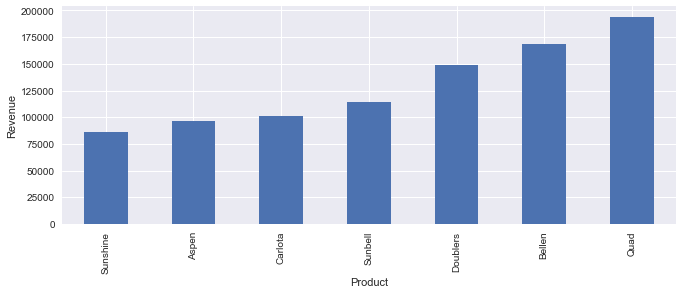

In [17]:
# Visualize number of Products via revenue
product_revenue.groupby(by=['Product'])['Revenue'].sum().sort_values(ascending=True).plot(
                                                                                          kind='bar',ylabel='Revenue');

# Sales trend

In [18]:
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']  = df['Date'].dt.day
# df = df.drop('Date',axis=1)

## Plot Yearly Sales Chart/Trend

In [19]:
years = [unique for unique in df.Year.unique()]
years

[2015, 2016, 2017]

In [20]:
def plot_trend(years:list, df):
    for year in years:
        new_df = df[df['Year'] == year]
        new_df.groupby('Date')['Revenue'].sum().plot(linewidth=1.2, 
                                             ylabel='Revenue', 
                                             xlabel='Date', 
                                             title='Sales Trend');

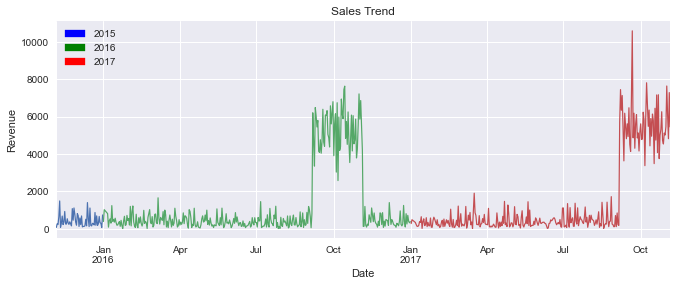

In [21]:
import matplotlib.patches as patches

year1 = patches.Patch(color='blue', label='2015')
year2 = patches.Patch(color='green', label='2016')
year3 = patches.Patch(color='red', label='2017')
plot_trend(years, df)
plt.legend(handles=[year1,year2,year3], loc=2);

**The trend plot looks symmetrical for the months of October in 2017 and 2018 respectively. <br> This shows that most sales are made within the month of October. what could have influenced this?**

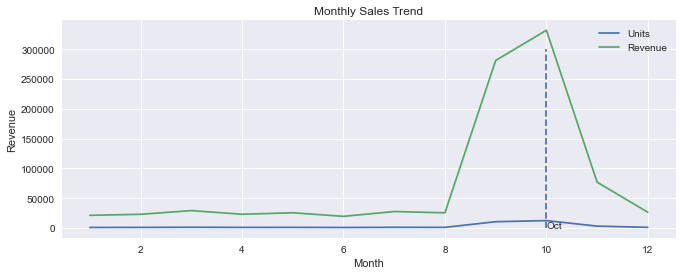

In [22]:
ax = df[['Month', 'Units', 'Revenue']].groupby('Month').sum().plot(
                                                                         title='Monthly Sales Trend', 
                                                                         ylabel='Revenue',
                                                                         );
ax.vlines(10,1,300000, linestyles='dashed')
ax.annotate('Oct',(10,0));

**How many times was entry made in each month?**


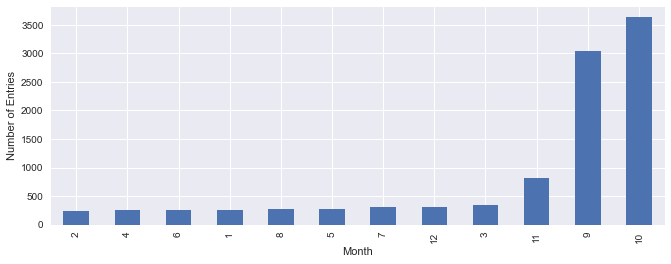

In [23]:
df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries');

In [59]:
products = pd.DataFrame(df[['Units','Revenue','Product','Month', 'Region']].groupby('Month')['Product'].value_counts())
products

Product
Month Product          
1     Bellen         52
      Quad           46
      Sunbell        34
      Aspen          33
      Sunshine       33
...                 ...
12    Sunbell        43
      Aspen          41
      Sunshine       36
      Carlota        35
      Doublers       32

[84 rows x 1 columns]

In [25]:
products['No_of_products'] = products['Product']
products.drop('Product', inplace=True, axis=1)
products = products.reset_index()

In [26]:
products

,Month,Product,No_of_products
0,1,Bellen,52
1,1,Quad,46
2,1,Sunbell,34
3,1,Aspen,33
4,1,Sunshine,33
...,...,...,...
79,12,Sunbell,43
80,12,Aspen,41
81,12,Sunshine,36
82,12,Carlota,35


In [27]:
products = products.pivot_table(values=['No_of_products'], index=['Month'], columns=['Product'], aggfunc= np.sum)
products

No_of_products                                              
Product          Aspen Bellen Carlota Doublers Quad Sunbell Sunshine
Month                                                               
1                   33     52      30       29   46      34       33
2                   26     45      29       25   45      35       26
3                   49     55      46       34   77      35       39
4                   31     37      35       27   50      43       25
5                   33     52      36       30   51      37       31
6                   37     53      23       21   52      30       36
7                   38     60      37       25   55      46       42
8                   34     54      26       35   51      35       35
9                  380    596     399      311  560     397      404
10                 476    735     439      333  697     491      460
11                 119    154     118       77  142     108      103
12                  41     55      35       32   64      43       36

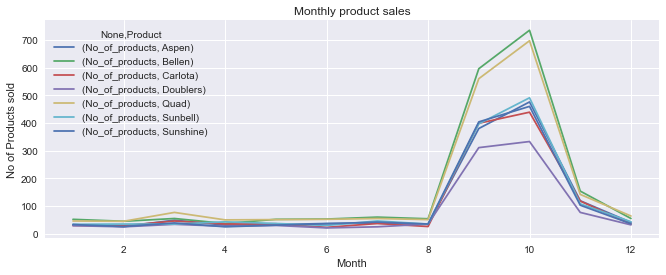

In [50]:
products.plot(ylabel='No of Products sold', title='Monthly product sales');

It's clear now that we sell more `Bellen` during october and that and HEAVY sales kick off between `September and late November`

## Monthly Revenue by Region

In [67]:
region_sales = pd.DataFrame(df[['Units','Revenue','Product','Month', 'Region']]).groupby(['Month','Region'])['Revenue'].sum()
region_sales = pd.DataFrame(region_sales)
region_sales

Revenue
Month Region           
1     East      5012.34
      South     7551.55
      West      8550.33
2     East      6428.75
      South     5540.10
      West     10864.87
3     East      6082.75
      South     8863.80
      West     14087.99
4     East      6420.63
      South     7647.28
      West      8865.57
5     East      8782.68
      South     5651.30
      West     10962.00
6     East      6442.85
      South     3954.90
      West      9020.65
7     East      7180.45
      South    10155.59
      West     10150.25
8     East      6031.55
      South     7767.60
      West     11567.37
9     East     70532.44
      South    83228.39
      West    127160.06
10    East     87858.60
      South    92034.70
      West    151780.43
11    East     19478.10
      South    24048.59
      West     33196.52
12    East      7625.65
      South     6812.70
      West     11831.54

In [69]:
region_sales = region_sales.reset_index()
region_sales = region_sales.pivot_table(values=['Revenue'], index=['Month'], columns=['Region'], aggfunc= np.sum)
region_sales

Revenue                     
Region      East     South       West
Month                                
1        5012.34   7551.55    8550.33
2        6428.75   5540.10   10864.87
3        6082.75   8863.80   14087.99
4        6420.63   7647.28    8865.57
5        8782.68   5651.30   10962.00
6        6442.85   3954.90    9020.65
7        7180.45  10155.59   10150.25
8        6031.55   7767.60   11567.37
9       70532.44  83228.39  127160.06
10      87858.60  92034.70  151780.43
11      19478.10  24048.59   33196.52
12       7625.65   6812.70   11831.54

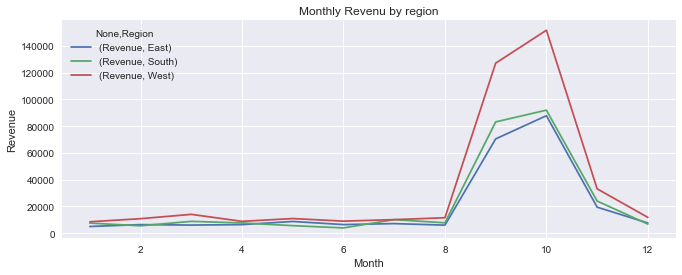

In [72]:
region_sales.plot(ylabel='Revenue', title='Monthly Revenu by region');

## Yearly changes in revenue

In [32]:
changes = pd.DataFrame(df.groupby([df.Date.dt.year])['Revenue'].sum())
changes

,Revenue
Date,
2015,24883.84
2016,444701.72
2017,439585.31


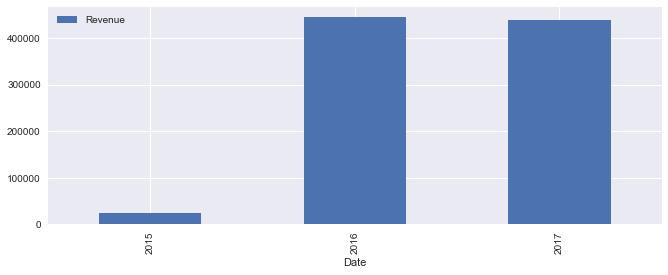

In [40]:
changes.plot(kind='bar');

## Top 3 products

In [41]:
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4500,114283.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93


Our top 3 products are `Bellen, Quad and Sunbell`

## The most productive sales Rep in the respective years. From your analysis, give 3 recommendations you think would help the company increase revenue in the following year.

In [49]:
salesReps = df[['SalesRep','Year','Revenue','Units']]
salesReps = pd.DataFrame(salesReps.groupby(['Year','SalesRep'])['Revenue'].sum())
salesReps.sort_values(by=['Year','Revenue'], ascending=False)

Revenue
Year SalesRep           
2017 Julie      99727.32
     Mike       96062.19
     Nabil      81079.23
     Jessica    69479.74
     Adam       49712.19
     Nicole     43524.64
2016 Mike      104590.64
     Julie      98895.58
     Nabil      74576.22
     Jessica    71469.42
     Adam       49184.21
     Nicole     45985.65
2015 Julie       5827.15
     Mike        4924.95
     Jessica     4547.12
     Adam        3819.20
     Nabil       3249.03
     Nicole      2516.39

Julie Stands out in sales revenue yearly except in 2016

## Conclusion/Recommendation:
1. The best months for sales are September, October and November. The company should look into creating jingles during these periods to further maximize profit.
2. Focus the ad targeted audience on `East and South Regions`
3. Finally Bellen and Quad sell most during these periods consider getting more of them.

In [77]:
!git add .

In [78]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/Sales Analysis-checkpoint.ipynb
	new file:   MODULE 2 Assessment (1).pdf
	new file:   MODULE 2-Assessment working data.xlsx
	new file:   Sales Analysis.ipynb
	new file:   sales-data.csv

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../../../../.DS_Store
	../../../../.aws-sam/
	../../../../.aws/
	../../../../.bash_history
	../../../../.composer/
	../../../../.config/
	../../../../.cookiecutter_replay/
	../../../../.cvlib/
	../../../../.docker/
	../../../../.gitconfig
	../../../../.idlerc/
	../../../../.ipynb_checkpoints/
	../../../../.ipython/
	../../../../.jupyter/
	../../../../.kaggle/
	../../../../.keras/
	../../../../.kite/
	../../../../.labelImgSettings.pkl
	../../../../.matplotlib/
	../../../../.npm/
	../../../../.python_history
	../../../../.redhat/
	../../../../.rnd
	../../../../.serverless/
	../../../../.

In [79]:
!git pull origin master

hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
